# 题目三

In [1]:
# import package
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
import scipy

In [2]:
# read the data

file_path = "D:/Docunments/Projects/Advaced-Applied-Statistics/data/final_data.xlsx"

# read the data file
data = pd.read_excel(file_path, '公用事业公司的运营数据')

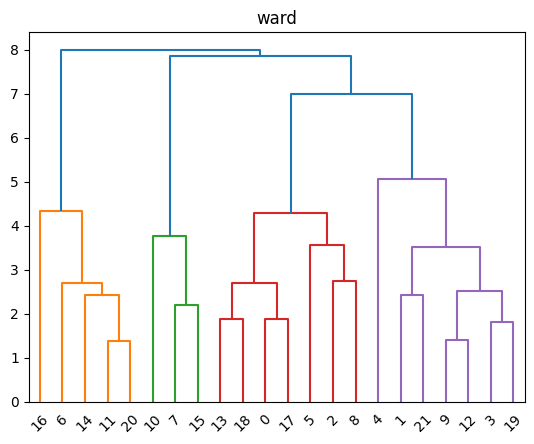

      V1    V2   V3    V4   V5     V6    V7     V8  class_ward
16  0.76   6.4  136  61.9  9.0   5714   8.3  1.920           1
14  0.96   7.6  164  62.2 -0.1   6468   0.9  1.400           1
6   1.22  12.2  175  67.6  2.2   7642   0.0  1.652           1
11  1.13  10.9  178  62.0  3.7   6154   0.0  1.897           1
20  1.04   8.6  204  61.0  3.5   6650   0.0  2.116           1
10  0.75   7.5  173  51.5  6.5  17441   0.0  0.768           2
15  1.16   9.9  252  56.0  9.2  15991   0.0  0.620           2
7   1.10   9.2  245  57.0  3.3  13082   0.0  0.309           2
18  1.16  11.7  104  54.0 -2.1  13507   0.0  0.636           3
17  1.05  12.6  150  56.7  2.7  10140   0.0  1.108           3
13  1.09  12.0   96  49.8  1.4   9673   0.0  0.588           3
0   1.06   9.2  151  54.4  1.6   9077   0.0  0.628           3
8   1.34  13.0  168  60.4  7.2   8406   0.0  0.862           3
5   1.32  13.5  111  60.0 -2.2  11127  22.5  1.241           3
2   1.43  15.4  113  53.0  3.4   9212   0.0  1.058     

In [3]:
# ward
# read the data file
ward = data.copy(deep=True)

# to standard the data
ward = (ward-ward.mean())/ward.std()

# dis = sch.distance.pdist(X=data, metric='euclidean')



Z = sch.linkage(ward, method='ward')

p = sch.dendrogram(Z)

plt.title('ward')
plt.show()

class_ward = sch.fcluster(Z, t=6, criterion='distance')

data['class_ward'] = class_ward

ward_class = data.sort_values(by='class_ward')

print(ward_class)

In [4]:
# Kmeans

k_model = KMeans(n_clusters=4)

result = k_model.fit_predict(data)

# add the column to data
data['k_class'] = result + 1

print(data.drop(columns='class_ward'))

      V1    V2   V3    V4   V5     V6    V7     V8  k_class
0   1.06   9.2  151  54.4  1.6   9077   0.0  0.628        3
1   0.89  10.3  202  57.9  2.2   5088  25.3  1.555        1
2   1.43  15.4  113  53.0  3.4   9212   0.0  1.058        3
3   1.02  11.2  168  56.0  0.3   6423  34.3  0.700        1
4   1.49   8.8  192  51.2  1.0   3300  15.6  2.044        1
5   1.32  13.5  111  60.0 -2.2  11127  22.5  1.241        3
6   1.22  12.2  175  67.6  2.2   7642   0.0  1.652        1
7   1.10   9.2  245  57.0  3.3  13082   0.0  0.309        4
8   1.34  13.0  168  60.4  7.2   8406   0.0  0.862        3
9   1.12  12.4  197  53.0  2.7   6455  39.2  0.623        1
10  0.75   7.5  173  51.5  6.5  17441   0.0  0.768        2
11  1.13  10.9  178  62.0  3.7   6154   0.0  1.897        1
12  1.15  12.7  199  53.7  6.4   7179  50.2  0.527        1
13  1.09  12.0   96  49.8  1.4   9673   0.0  0.588        3
14  0.96   7.6  164  62.2 -0.1   6468   0.9  1.400        1
15  1.16   9.9  252  56.0  9.2  15991   

d:\Software\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
print(data)

      V1    V2   V3    V4   V5     V6    V7     V8  class_ward  k_class
0   1.06   9.2  151  54.4  1.6   9077   0.0  0.628           3        3
1   0.89  10.3  202  57.9  2.2   5088  25.3  1.555           4        1
2   1.43  15.4  113  53.0  3.4   9212   0.0  1.058           3        3
3   1.02  11.2  168  56.0  0.3   6423  34.3  0.700           4        1
4   1.49   8.8  192  51.2  1.0   3300  15.6  2.044           4        1
5   1.32  13.5  111  60.0 -2.2  11127  22.5  1.241           3        3
6   1.22  12.2  175  67.6  2.2   7642   0.0  1.652           1        1
7   1.10   9.2  245  57.0  3.3  13082   0.0  0.309           2        4
8   1.34  13.0  168  60.4  7.2   8406   0.0  0.862           3        3
9   1.12  12.4  197  53.0  2.7   6455  39.2  0.623           4        1
10  0.75   7.5  173  51.5  6.5  17441   0.0  0.768           2        2
11  1.13  10.9  178  62.0  3.7   6154   0.0  1.897           1        1
12  1.15  12.7  199  53.7  6.4   7179  50.2  0.527           4  

In [6]:
# check the correlation

corrr = []
p_val = []
for each in data.columns[:8]:
    corr, p = scipy.stats.pearsonr(data[each], data['k_class'])
    corrr.append(corr)
    p_val.append(p)

corr = pd.DataFrame({'var':data.columns[:8], 'corr':corrr, 'p-value':p_val})

print(corr)


  var      corr   p-value
0  V1  0.208749  0.351185
1  V2  0.265086  0.233159
2  V3 -0.313765  0.155029
3  V4 -0.343431  0.117620
4  V5 -0.164693  0.463919
5  V6  0.633457  0.001551
6  V7 -0.422559  0.050092
7  V8 -0.496762  0.018680


In [7]:
# to standard the data and kmeans

data_std = (data-data.mean())/data.std()

k_model_std = KMeans(n_clusters=4)

result_std = k_model_std.fit_predict(data_std)

# add the column to data
data['k_class_std'] = result_std + 1

print(data.drop(columns='class_ward'))

      V1    V2   V3    V4   V5     V6    V7     V8  k_class  k_class_std
0   1.06   9.2  151  54.4  1.6   9077   0.0  0.628        3            2
1   0.89  10.3  202  57.9  2.2   5088  25.3  1.555        1            1
2   1.43  15.4  113  53.0  3.4   9212   0.0  1.058        3            2
3   1.02  11.2  168  56.0  0.3   6423  34.3  0.700        1            1
4   1.49   8.8  192  51.2  1.0   3300  15.6  2.044        1            1
5   1.32  13.5  111  60.0 -2.2  11127  22.5  1.241        3            2
6   1.22  12.2  175  67.6  2.2   7642   0.0  1.652        1            4
7   1.10   9.2  245  57.0  3.3  13082   0.0  0.309        4            3
8   1.34  13.0  168  60.4  7.2   8406   0.0  0.862        3            2
9   1.12  12.4  197  53.0  2.7   6455  39.2  0.623        1            1
10  0.75   7.5  173  51.5  6.5  17441   0.0  0.768        2            3
11  1.13  10.9  178  62.0  3.7   6154   0.0  1.897        1            4
12  1.15  12.7  199  53.7  6.4   7179  50.2  0.527 

d:\Software\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
corrr_std = []
p_val_std = []
for each in data.columns[:8]:
    corr, p = scipy.stats.pearsonr(data[each], data['k_class_std'])
    corrr_std.append(corr)
    p_val_std.append(p)

corr_std = pd.DataFrame({'var':data.columns[:8], 'corr_std':corrr_std, 'p-value_std':p_val_std})

print(corr_std)

  var  corr_std  p-value_std
0  V1 -0.309684     0.160760
1  V2 -0.418463     0.052598
2  V3  0.094409     0.676018
3  V4  0.606521     0.002766
4  V5  0.185992     0.407260
5  V6  0.143822     0.523120
6  V7 -0.697627     0.000307
7  V8  0.412147     0.056648
